<a href="https://colab.research.google.com/github/gabrielutomo/dead4haze/blob/main/EDA_Top_Youtube_Music_Hits_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ayeshaimran123_top_youtube_music_hits_2025_path = kagglehub.dataset_download('ayeshaimran123/top-youtube-music-hits-2025')

print('Data source import complete.')


Using Colab cache for faster access to the 'top-youtube-music-hits-2025' dataset.
Data source import complete.


# Introduction

According to YouTube performence, the most popular songs of the year are highlighted in the YouTube Top 100 Songs 2025 dataset. It provide complete information about each song, including title, artst details, views, categories, tags, duration, and chanel data.

# Import Necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv("/kaggle/input/top-youtube-music-hits-2025/youtube-top-100-songs-2025.csv")
df.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


In [21]:
# Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


In [22]:
# Describing Dataset
df.describe()

,view_count,duration,channel_follower_count
count,1.000000e+02,100.000000,1.000000e+02
mean,1.059103e+08,203.900000,1.612067e+07
std,2.491132e+08,44.260592,1.980038e+07
min,1.161000e+03,120.000000,1.000000e+00
25%,1.852702e+07,173.000000,6.132500e+05
50%,3.798224e+07,193.500000,6.320000e+06
75%,1.111073e+08,231.750000,2.760000e+07
max,2.009015e+09,354.000000,7.620000e+07


In [23]:
# Checking null values present in the dataset
df.isnull().sum()

,0
title,0
fulltitle,0
description,0
view_count,0
categories,0
tags,15
duration,0
duration_string,0
live_status,0
thumbnail,0


In [24]:
# Reading Tail of Dataset
df.tail()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
95,Ariana Grande - twilight zone (Official Lyric ...,Ariana Grande - twilight zone (Official Lyric ...,The official “twilight zone” official lyric vi...,18245315,Music,Ariana Grande;Republic Records;Pop,202,3:22,False,https://i.ytimg.com/vi/x1XIJM6spaE/maxresdefau...,Ariana Grande,https://www.youtube.com/channel/UC0VOyT2OCBKdQ...,56400000
96,"Gracie Abrams - I Love You, I’m Sorry (Officia...","Gracie Abrams - I Love You, I’m Sorry (Officia...","Listen to the new album, The Secret of Us, out...",31456772,Music,"Gracie Abrams;Gracie Abrams, under exclusive l...",234,3:54,False,https://i.ytimg.com/vi/uxjhN_Donfw/maxresdefau...,Gracie Abrams,https://www.youtube.com/channel/UCVFRVXH1hRoWk...,1770000
97,HoodTrophy Bino ft. FCG Heem - Miami (Official...,HoodTrophy Bino ft. FCG Heem - Miami (Official...,HoodTrophy Bino and FCG Heem drop Miami. From...,66051,Music,NaN,197,3:17,False,https://i.ytimg.com/vi_webp/I-gmbHgeN1I/maxres...,HoodTrophy Bino,https://www.youtube.com/channel/UCsaZi3QZrZ5-s...,20300
98,Sean Paul x INNA - Let It Talk To Me,Sean Paul x INNA - Let It Talk To Me,Song Title: Sean Paul x INNA - Let It Talk To ...,16952860,Music,Sean Paul,155,2:35,False,https://i.ytimg.com/vi_webp/nkRyAVQdqAA/maxres...,Sean Paul,https://www.youtube.com/channel/UCkdc7gHpavxpg...,5200000
99,"Selena Gomez, benny blanco - How Does It Feel ...","Selena Gomez, benny blanco - How Does It Feel ...",Listen to the new album 'I Said I Love You Fir...,16971256,Music,Selena Gomez;benny blanco;SMG Music LLC Friend...,161,2:41,False,https://i.ytimg.com/vi/4LcNr0T2yAA/maxresdefau...,Selena Gomez,https://www.youtube.com/channel/UCjK8ORC71kwyj...,35500000


In [25]:
# Reading columns of Dataset
pd.DataFrame(df.dtypes,columns=["Data Types"])

,Data Types
title,object
fulltitle,object
description,object
view_count,int64
categories,object
tags,object
duration,int64
duration_string,object
live_status,bool
thumbnail,object


In [26]:
# Checking Shape of Dataset
print("the shape of Dataset is {},rows and {} columns".format(len(df),len(df.columns)))

the shape of Dataset is 100,rows and 13 columns


In [27]:
# Checking Number of Duplicated Values in the Dataset
print("Duplicated Values in the Dataset are",df.duplicated().sum())

Duplicated Values in the Dataset are 0


In [28]:
print(df['title'].nunique())

100


In [29]:
print(df['fulltitle'].nunique())

100


In [30]:
print(df['description'].nunique())

100


In [31]:
print(df['view_count'].nunique())

100


In [32]:
print(df['categories'].nunique())

2


In [33]:
print(df['tags'].nunique())

76


In [34]:
print(df['duration'].nunique())

69


In [35]:
print(df['duration_string'].nunique())

69


In [36]:
print(df['live_status'].nunique())

1


In [37]:
print(df['thumbnail'].nunique())

100


In [38]:
print(df['channel'].nunique())

65


In [39]:
print(df['channel_url'].nunique())

69


In [40]:
print(df['channel_follower_count'].nunique())

65


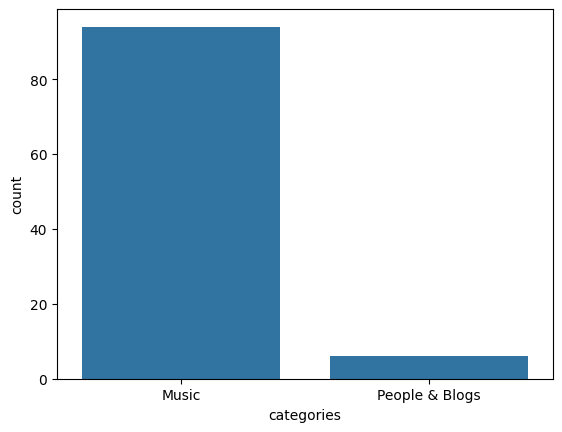

In [41]:
sns.countplot(x="categories", data=df)
plt.show()

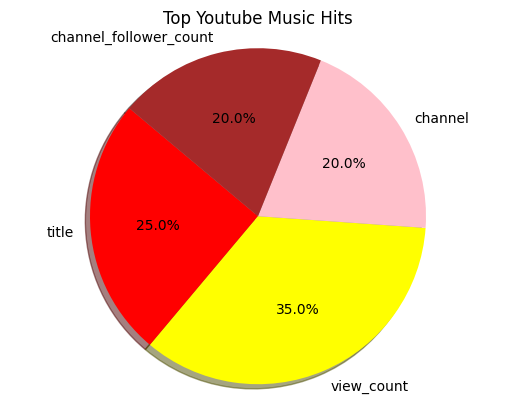

In [42]:
# Creat pie chart
labels = ['title', 'view_count', 'channel', 'channel_follower_count']
sizes = [25, 35, 20, 20]
colors = ['red', 'yellow', 'pink', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Top Youtube Music Hits')
plt.axis('equal')
plt.show()

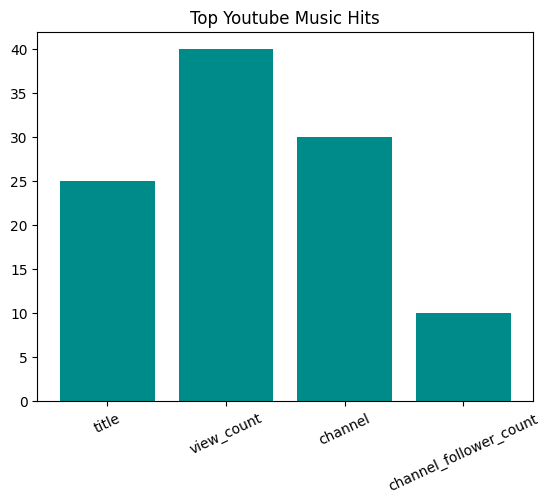

In [43]:
# Create bar plot
categories = ['title', 'view_count', 'channel', 'channel_follower_count']
values = [25, 40, 30, 10]
plt.bar(categories, values, color='darkcyan')
plt.title('Top Youtube Music Hits')
plt.xticks(rotation = 25)

# Show the plot
plt.show()

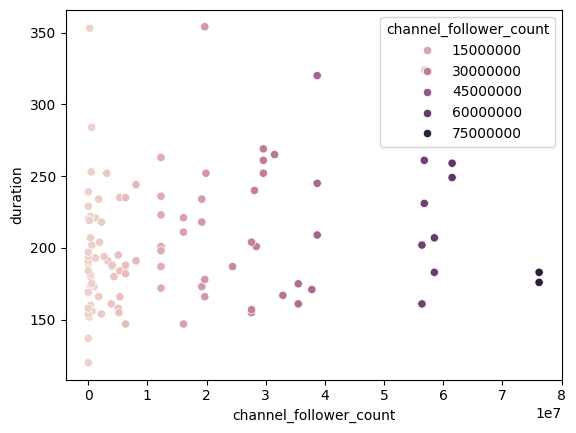

In [44]:
# Scatter Plot
sns.scatterplot(x = "channel_follower_count",y = "duration",data = df,hue = "channel_follower_count")
plt.show()

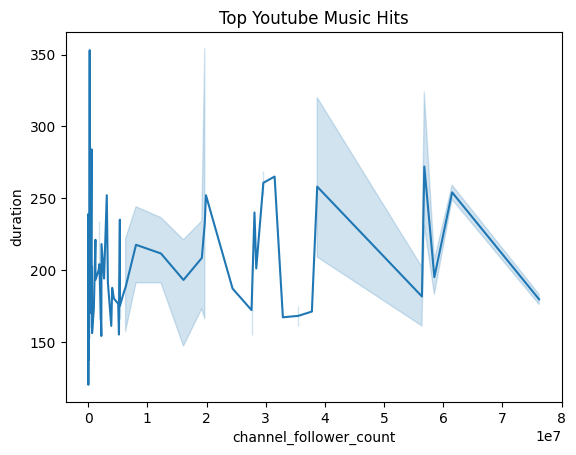

In [45]:
# Lineplot
sns.lineplot(x="channel_follower_count",y="duration",data=df)
plt.title("Top Youtube Music Hits")
plt.xlabel("channel_follower_count")
plt.ylabel("duration")
plt.show()


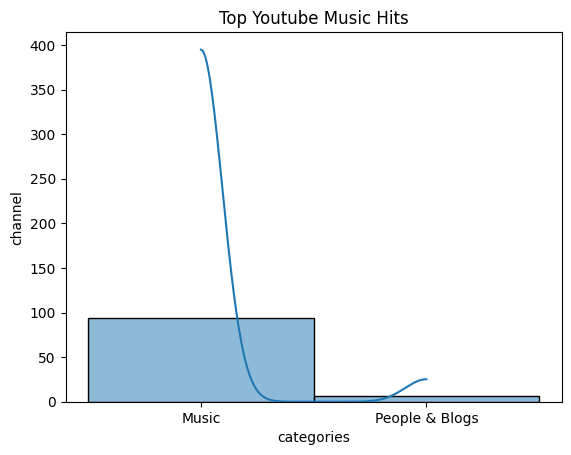

In [46]:
# Histplot
sns.histplot(df["categories"],bins=10,kde=True)
plt.title("Top Youtube Music Hits")
plt.xlabel("categories")
plt.ylabel("channel")
plt.show()

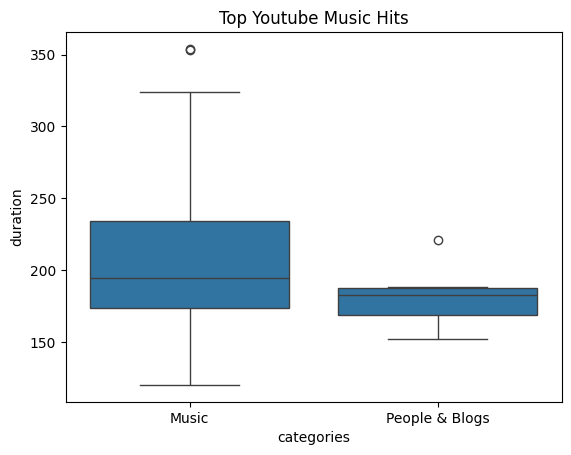

In [47]:
sns.boxplot(x="categories",y="duration",data=df)
plt.title("Top Youtube Music Hits")
plt.xlabel("categories")
plt.ylabel("duration")
plt.show()

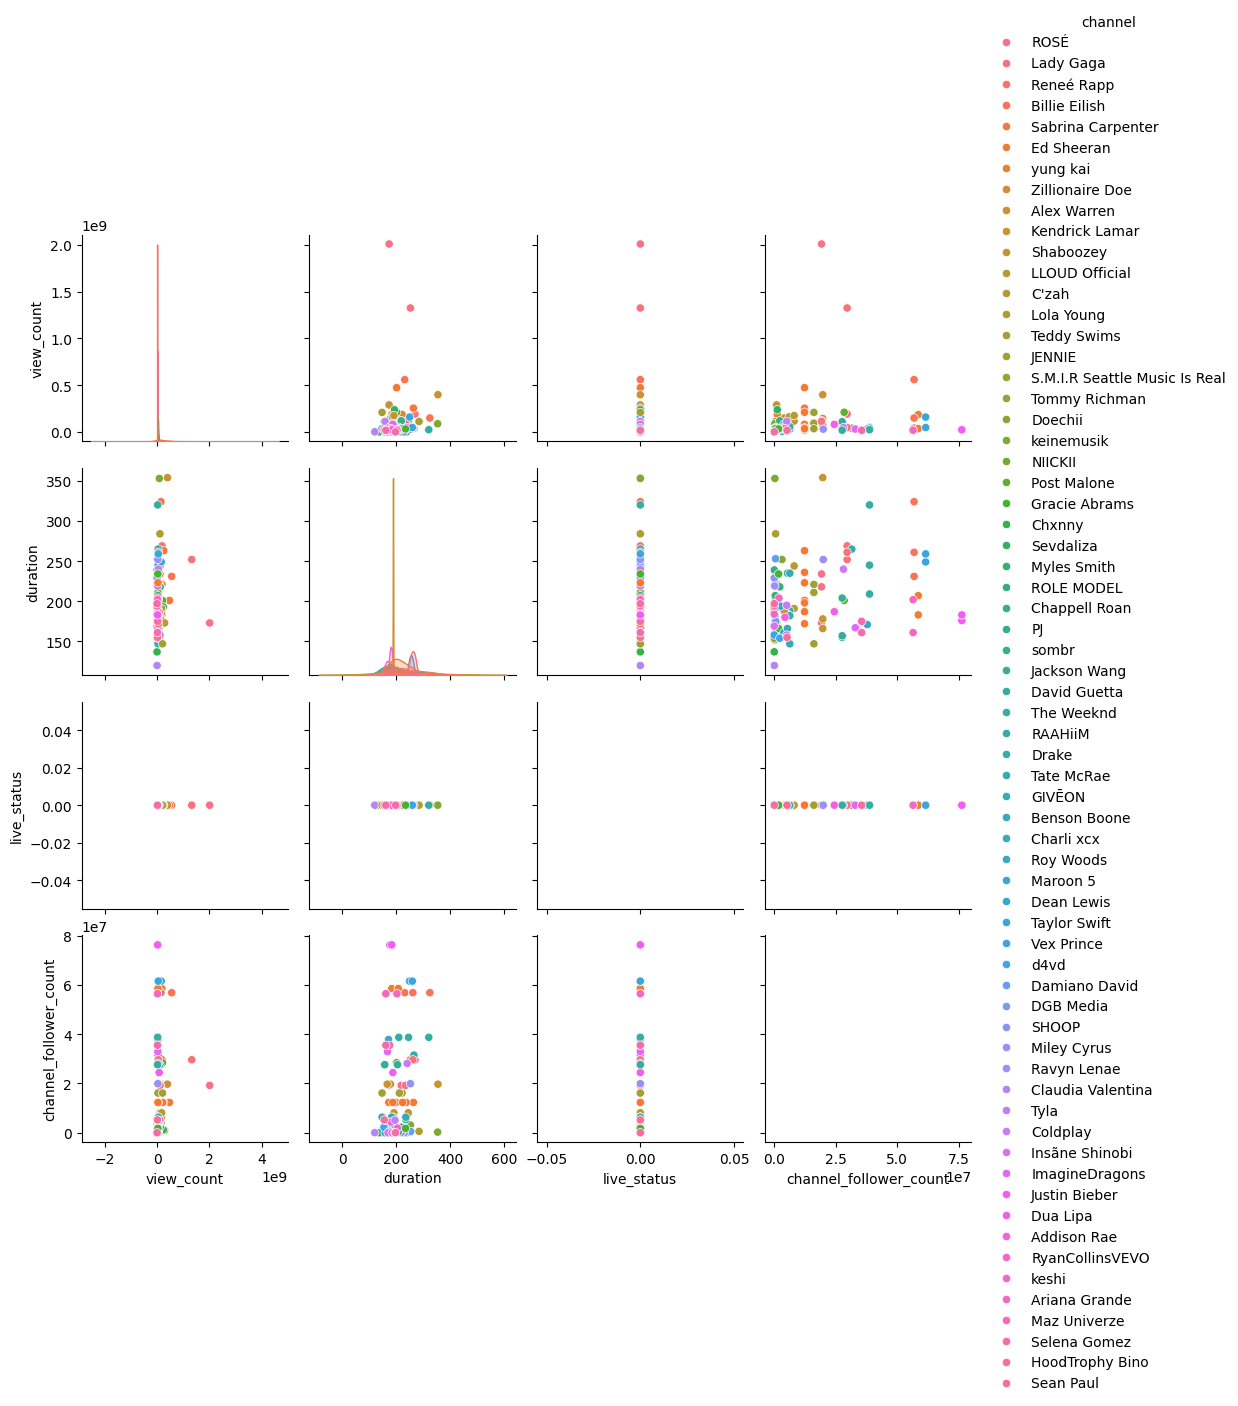

In [48]:
sns.pairplot(df,hue="channel")
plt.show()